In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

In [68]:
# A function is defined that print out Cloudy input file for coronal model
def make_coronal(T, name='Coronal2'):
    Min = pc.CloudyInput('../models/{}_{}'.format(name, np.log10(T)))
    Min.set_cste_density(0)
    Min.set_stop(('temperature off',
                  'Lyman optical depth = 10 linear'))
    Min.set_other(('set temperature floor {} K'.format(T),
                   'Table HM12 redshift 0.67',
                   'Cosmic Rays Background'))
    Min.set_emis_tab(('H  1 1215.67A', 'C  4 1548.19A', 'O  6 1031.91A'))
    Min.print_input()

In [69]:
make_coronal(T=1e3)
make_coronal(T=1e4)
make_coronal(T=2e4)
make_coronal(T=3e4)
make_coronal(T=1e5)
make_coronal(T=3e5)

In [70]:
pc.run_cloudy('../models', model_name='Coronal2', n_proc=8)

In [2]:
Ms = pc.load_models('../models/Coronal2_', read_opd=True)

In [3]:
for M in Ms:
    M.print_stats()
    print(M.depth[-1])

 Name of the model: ../models/Coronal2_3.0
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 H+ mass = 3.75e+21, H mass = 2.09e+22 N zones: 49
 <H+/H> = 0.22, <He++/He> = 0.00, <He+/He> = 0.22
 <O+++/O> = 0.00, <O++/O> = 0.00, <O+/O> = 0.18
 <N+++/O> = 0.00, <N++/O> = 0.00, <N+/O> = 0.20
 T(O+++) = nan, T(O++) = 2633, T(O+) = 2583
 <ne> = 0,  <nH> = 1, T0 = 2451, t2=0.0174
 <log U> = -5.52
1.9535e+18
 Name of the model: ../models/Coronal2_4.0
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 H+ mass = 7.05e+21, H mass = 2.38e+22 N zones: 42
 <H+/H> = 0.34, <He++/He> = 0.00, <He+/He> = 0.31
 <O+++/O> = 0.00, <O++/O> = 0.00, <O+/O> = 0.30
 <N+++/O> = 0.00, <N++/O> = 0.00, <N+/O> = 0.42
 T(O+++) = nan, T(O++) = 10000, T(O+) = 10000
 <ne> = 0,  <nH> = 1, T0 = 10000, t2=0.0000
 <log U> = -5.52
2.2444e+18
 Name of the model: ../models/Coronal2_4.301029995663981
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 H+ mass = 

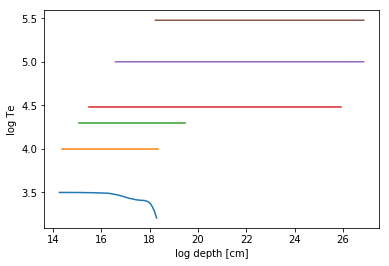

In [4]:
for M in Ms:
    plt.plot(np.log10(M.depth), np.log10(M.te),
             label='{:4.2}'.format(np.log10(M.te[0])))
plt.xlabel('log depth [cm]')
plt.ylabel('log Te');

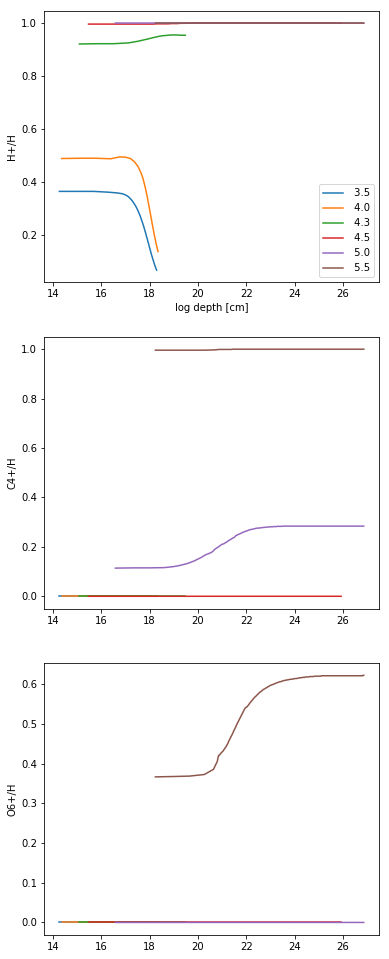

In [5]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(6,17))
for M in Ms:
    ax1.plot(np.log10(M.depth), M.get_ionic('H',1),
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax2.plot(np.log10(M.depth), M.get_ionic('C',4),
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax3.plot(np.log10(M.depth), M.get_ionic('O',6),
             label='{:4.2}'.format(np.log10(M.te[0])))
ax1.set_xlabel('log depth [cm]')
ax1.set_ylabel('H+/H')
ax2.set_ylabel('C4+/H')
ax3.set_ylabel('O6+/H')
ax1.legend();

In [6]:
for M in Ms:
    print('Te={}, Tau 912 = {}, Nzones = {}'.format(M.te[0],
                                                    M.out['###Last'].split('912:')[1].split('#')[0],
                                            M.n_zones))    

Te=3159.2, Tau 912 =  1.03e+01, Nzones = 49
Te=10000.0, Tau 912 =  1.00e+01, Nzones = 42
Te=20000.0, Tau 912 =  1.01e+01, Nzones = 19
Te=30000.0, Tau 912 =  1.00e+01, Nzones = 276
Te=100000.0, Tau 912 =  6.22e-01, Nzones = 1400
Te=300000.0, Tau 912 =  1.39e+00, Nzones = 1400


In [7]:
M.emis_labels

array(['H__1_121568A', 'C__4_154819A', 'O__6_103191A'], 
      dtype='<U12')

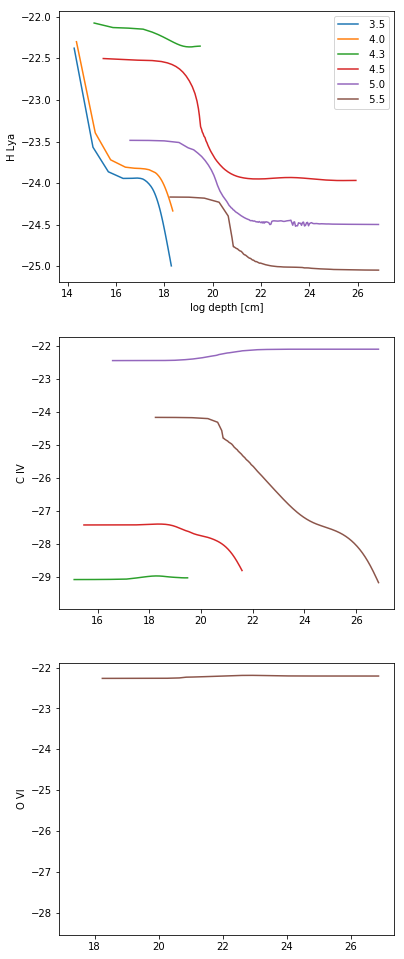

In [9]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(6,17))
for M in Ms:
    ax1.plot(np.log10(M.depth), np.log10(M.get_emis('H__1_121568A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax2.plot(np.log10(M.depth), np.log10(M.get_emis('C__4_154819A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
    ax3.plot(np.log10(M.depth), np.log10(M.get_emis('O__6_103191A')), 
             label='{:4.2}'.format(np.log10(M.te[0])))
ax1.set_xlabel('log depth [cm]')
ax1.set_ylabel('H Lya')
ax2.set_ylabel('C IV')
ax3.set_ylabel('O VI')
ax1.legend();